In [1]:
# import pakcages
import pandas as pd
import numpy as np

In [2]:
# load Data Via Package
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Text Cleaning
import neattext.functions as nfx

In [4]:
# Load Dataset
df = pd.read_csv("emotion_dataset.csv")

In [5]:
# drop the unused column
df.drop(df.columns[[0, 3]], axis=1, inplace=True)

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
# shape
df.shape

(34792, 2)

In [8]:
# check the data types
df.dtypes

Emotion    object
Text       object
dtype: object

In [9]:
# check for any missing values
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [10]:
# values counts of emotions
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

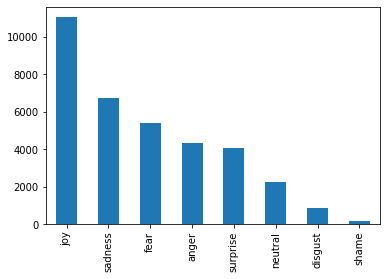

In [11]:
# values counts of emotions
df['Emotion'].value_counts().plot(kind='bar')

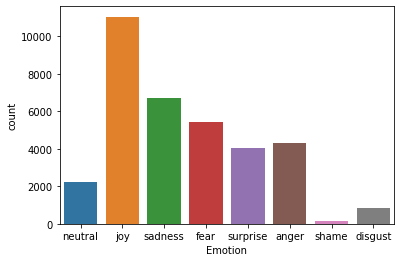

In [12]:
# Using Seaborn to plot
# Old Method
sns.countplot(df['Emotion'])

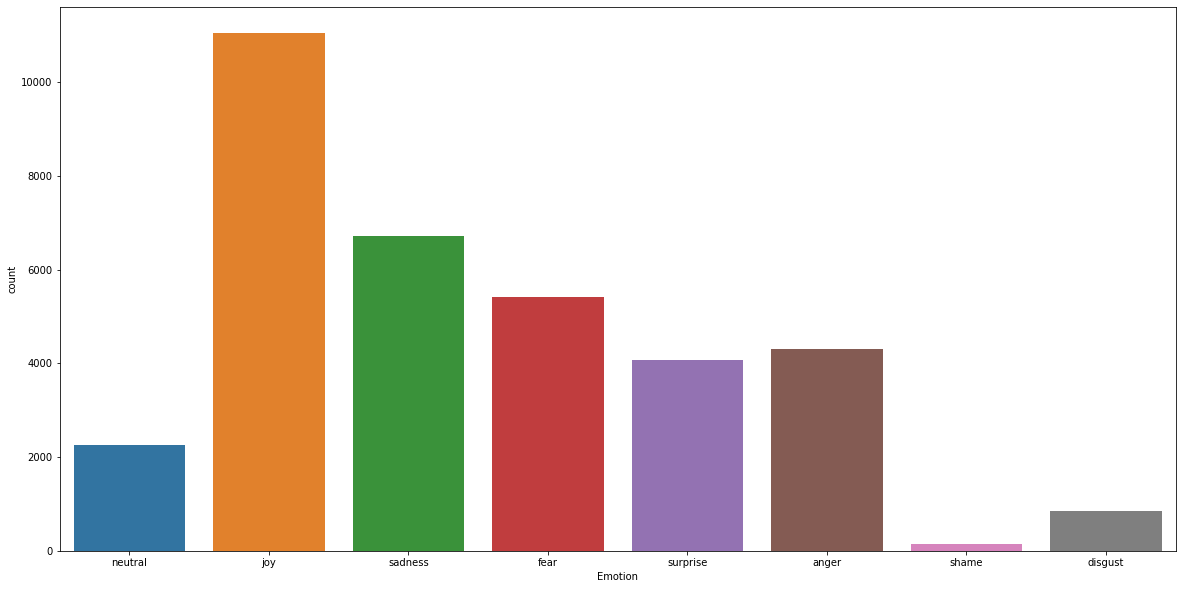

In [13]:
# New Method
plt.figure(figsize=(20, 10))
sns.countplot(x='Emotion', data=df)
plt.show()

In [14]:
### Exploration
## Text Cleaning
##+ Sentiment Analysis
##+ Keyword Extraction
##    - Keywords for each emotion
##    - WordCloud

In [15]:
# Sentiment Analysis
from textblob import TextBlob

In [16]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        result = "Postive"
    elif sentiment < 0:
        result = "Negative"
    else:
        result = "Neutral"
    return result

In [17]:
# Test Fxn
get_sentiment("I love U")

'Postive'

In [18]:
df['Sentiment'] = df['Text'].apply(get_sentiment)

In [19]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Postive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [20]:
# compare emotion vs sentiment
df.groupby(['Emotion', 'Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Postive      1124
disgust   Negative      325
          Neutral       249
          Postive       282
fear      Negative     1534
          Neutral      1843
          Postive      2033
joy       Negative     1682
          Neutral      3648
          Postive      5715
neutral   Negative      178
          Neutral      1523
          Postive       553
sadness   Negative     2630
          Neutral      2127
          Postive      1965
shame     Negative       46
          Neutral        50
          Postive        50
surprise  Negative      623
          Neutral      1545
          Postive      1894
dtype: int64

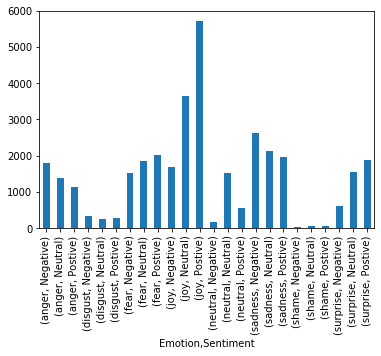

In [21]:
# First Method: Using Matplotlib
df.groupby(['Emotion', 'Sentiment']).size().plot(kind='bar')

In [22]:
# Using seaborn
sns.factorplot
sns.catplot

<function seaborn.categorical.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean at 0x0000020BFE3F4678>, ci=95, n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


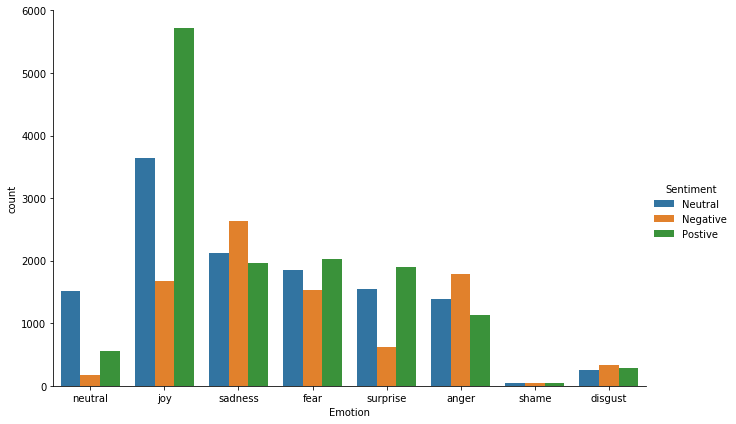

In [23]:
sns.factorplot(x='Emotion', hue='Sentiment', data=df, kind='count', size=6, aspect=1.5)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3695: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


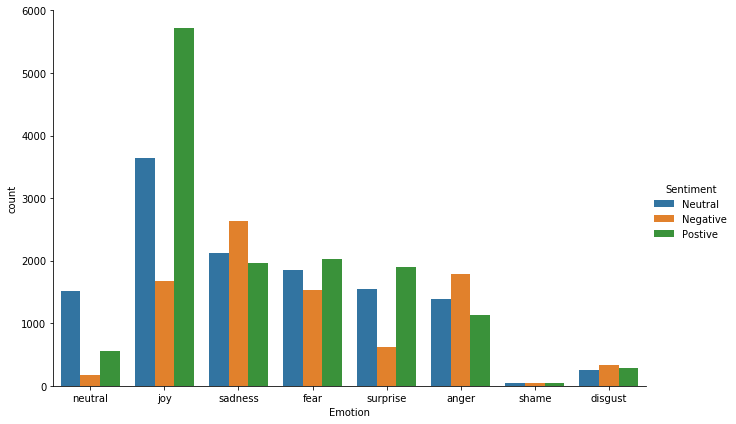

In [24]:
sns.catplot(x='Emotion', hue='Sentiment', data=df, kind='count', size=6, aspect=1.5)

In [25]:
## Text Cleaning, Remove Noise, StopWords, Special Char, Punctuation
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [26]:
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [27]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_userhandles)

In [28]:
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

In [29]:
df[['Text','Clean_Text']]

,Text,Clean_Text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [30]:
# Keyword Extraction
# Extract most commonest words per class of emotion

In [31]:
from collections import Counter

In [32]:
def extract_keywords(text, num=50):
    tokens = [token for token in text.split()]
    most_common_token = Counter(tokens).most_common(num)
    return dict(most_common_token)

In [33]:
emotion_list = df['Emotion'].unique().tolist()
emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [34]:
joy_list = df[df['Emotion'] == 'joy']['Clean_Text'].tolist()

In [35]:
# Joy Document
joy_docx = ' '.join(joy_list)
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [36]:
# Extract Keywords
keywords_joy = extract_keywords(joy_docx)
keywords_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [37]:
# Plot
def plot_most_common_words(mydict, emotion_name):
    df_01 = pd.DataFrame(mydict.items(), columns=['token', 'count'])
    plt.figure(figsize=(20,10))
    plt.title("Plot of {}".format(emotion_name))
    sns.barplot(x='token', y='count', data=df_01)
    plt.xticks(rotation=45)
    plt.show()

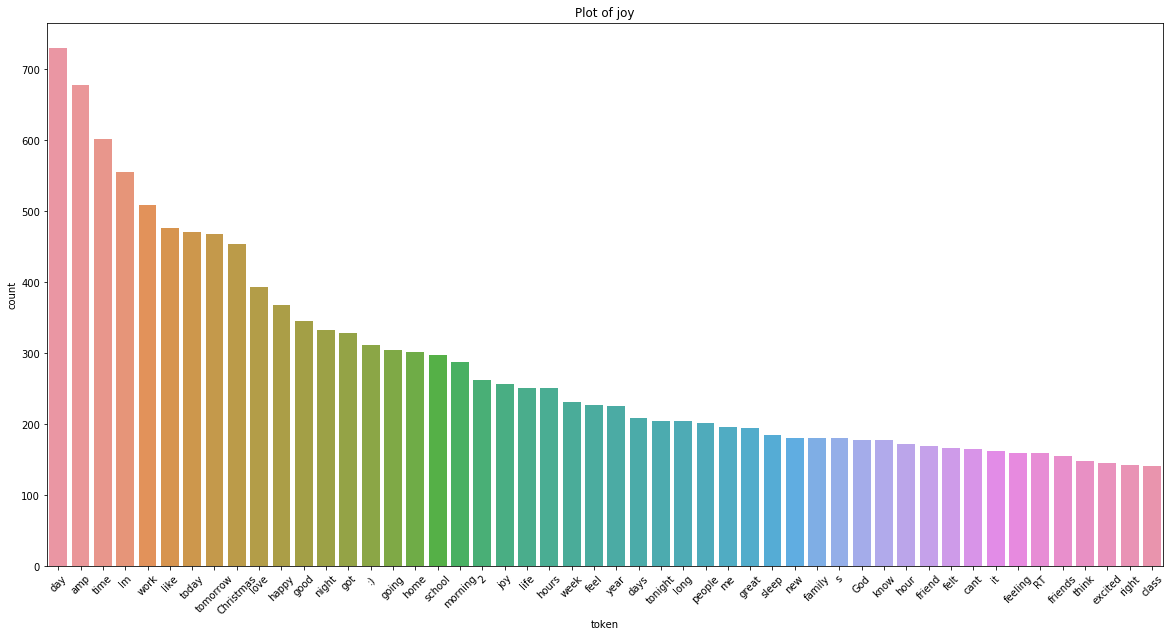

In [38]:
plot_most_common_words(keywords_joy, "joy")

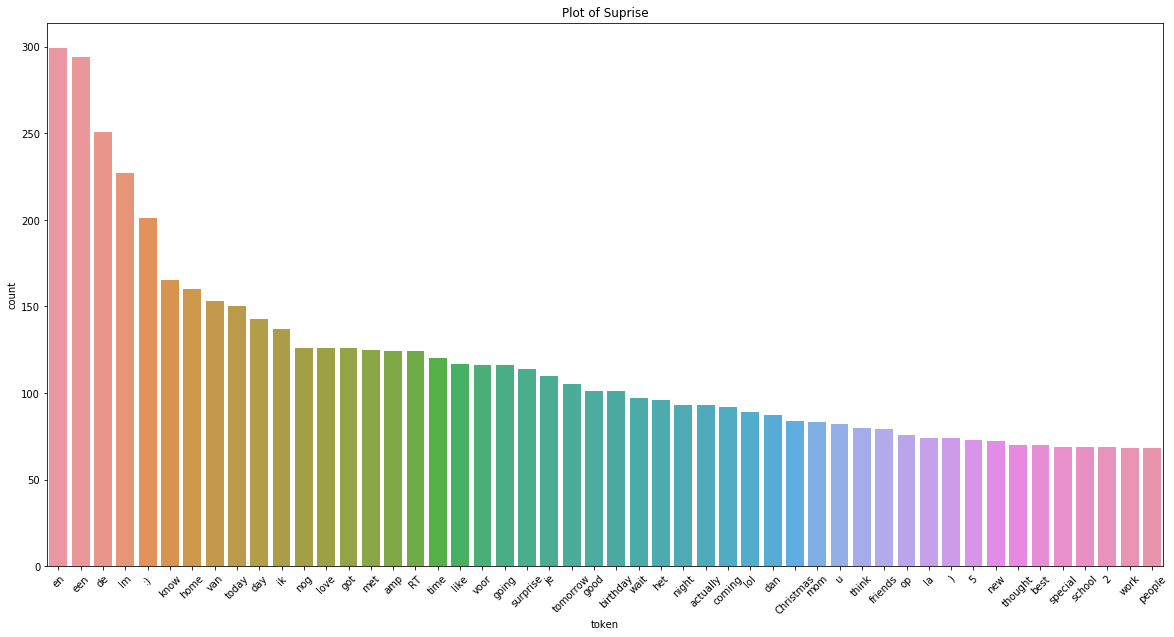

In [39]:
# Surprise
suprise_list = df[df['Emotion'] == 'surprise']['Clean_Text'].tolist()
suprise_docx = ' '.join(suprise_list)
keywords_suprise = extract_keywords(suprise_docx)
plot_most_common_words(keywords_suprise, "Suprise")

In [40]:
## Machine Learning
# Naive Bayes
# LogisticRegression
# KNN
# Decision Tree

## Compare wih SparkNLP/ NLU John Snows Lab

In [41]:
# Load ML Pkgs
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [42]:
# Split the dataset
from sklearn.model_selection import train_test_split

In [43]:
# Build Features From Our Text

In [44]:
Xfeatures = df['Clean_Text']
yLabels = df['Emotion']

Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_Text, Length: 34792, dtype: object

In [45]:
# Vectorizer
cv = CountVectorizer()
X = cv.fit_transform(Xfeatures)

In [46]:
# Get Feaatures By Name
cv.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [101]:
# try to save
import joblib
joblib.dump(cv, "vectorizer.pkl")

['vectorizer.pkl']

In [105]:
vectorizer = joblib.load("vectorizer.pkl")
vectorizer.get_feature_names()

['00',
 '000',
 '000ème',
 '0021',
 '00am',
 '00pm',
 '01',
 '0235299130',
 '0330',
 '0400',
 '045',
 '05',
 '0512',
 '06',
 '073',
 '0798765',
 '08',
 '0800',
 '09',
 '099b8',
 '0l',
 '0ntworpen',
 '0o',
 '0oquot',
 '0w',
 '10',
 '100',
 '1000',
 '10000',
 '100000',
 '100000yr',
 '10000th',
 '1000gifts',
 '1000s',
 '1000shs',
 '1000th',
 '100s',
 '100th',
 '101',
 '1010',
 '1015',
 '101quot',
 '102',
 '1021',
 '1022',
 '103',
 '1030',
 '1030am',
 '1030pm',
 '10373629',
 '104',
 '1040',
 '105',
 '106',
 '1080',
 '10am',
 '10ans',
 '10h',
 '10hrs',
 '10k',
 '10mins',
 '10pm',
 '10puntos',
 '10ritengono',
 '10th',
 '10x',
 '10year',
 '10years',
 '10yrolds',
 '11',
 '110',
 '1100pm',
 '1104',
 '110km',
 '111',
 '1111ème',
 '112',
 '1130',
 '115',
 '1162',
 '118',
 '11am',
 '11hour',
 '11months',
 '11pm',
 '11yr',
 '12',
 '120',
 '1200',
 '121',
 '12181',
 '122',
 '122511',
 '123',
 '1230',
 '125',
 '1250',
 '12521260',
 '128',
 '128600',
 '1295',
 '12days',
 '12hours',
 '12hr',
 '12hrstwi

In [47]:
def predict_emotion2(sample_text, model):
    myvect = vectorizer.transform(sample_text).toarray()
    print(pd.DataFrame(myvect))
    # Make Prediction
    prediction = model.predict(myvect)
    # find the highest probability
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print("Prediction :")
    print(prediction[0])
    return pred_percentage_for_all

predict_emotion2(["Hi I love u"], nv_model)

NameError: name 'nv_model' is not defined

In [48]:
r = pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
print("CountVector")
r

CountVector


,00,000,000ème,0021,00am,00pm,01,0235299130,0330,0400,...,งป,งย,นก,นใน,ยอมตายไปส,หญ,เขาจะเผาม,ღƪ,ℕoíʀ,ㄒʜℰℳℰ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34787,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34788,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34790,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
# To Dense Array (Numpy)
# X.toarray

In [50]:
# Split Dataset
X_train,X_test,y_train,y_test = train_test_split(X, yLabels, test_size=0.3, random_state=42)

In [51]:
# Build Our Model


In [52]:
nv_model = MultinomialNB()
nv_model.fit(X_train, y_train)

MultinomialNB()

In [53]:
# Accuracy
# Method 1
nv_model.score(X_test, y_test)

0.5642843456600881

In [65]:
y_pred_for_nv = nv_model.predict(X_test)

In [66]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [67]:
### Make A Single Prediction
# Vectorized our Text
# Applied our model

In [68]:
sample_text = ["She seemed so sad for him."]

In [69]:
vect = cv.transform(sample_text).toarray()

In [70]:
# Make Prediction
nv_model.predict(vect)

array(['sadness'], dtype='<U8')

In [71]:
# Check For the Prediction Probability(Percentage)/ Confidence score
nv_model.predict_proba(vect)

array([[3.41533995e-01, 1.01889226e-03, 2.87408381e-02, 2.29774869e-01,
        4.69773742e-05, 3.98174494e-01, 5.12761127e-06, 7.04807223e-04]])

In [72]:
# Get all class for model
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [73]:
np.max(nv_model.predict_proba(vect))

0.3981744937187783

In [95]:
def predict_emotion(sample_text, model):
    myvect = cv.transform(sample_text).toarray()
    print(pd.DataFrame(myvect))
    # Make Prediction
    prediction = model.predict(myvect)
    # find the highest probability
    pred_proba = model.predict_proba(myvect)
    pred_percentage_for_all = dict(zip(model.classes_, pred_proba[0]))
    print("Prediction :")
    print(prediction[0])
    return pred_percentage_for_all
    
    

In [96]:
predict_emotion(["Hello"], nv_model)

   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   

   34878  34879  34880  34881  34882  34883  34884  34885  34886  34887  
0      0      0      0      0      0      0      0      0      0      0  

[1 rows x 34888 columns]
Prediction :
joy


{'anger': 0.03805648184491687,
 'disgust': 0.01070402999939303,
 'fear': 0.0836589716026022,
 'joy': 0.37069014462448235,
 'neutral': 0.3083060175931171,
 'sadness': 0.1514424315784173,
 'shame': 0.001157351274750909,
 'surprise': 0.03598457148232029}

In [76]:
### doing model Evaluation

In [77]:
# classification
print(classification_report(y_test, y_pred_for_nv))

              precision    recall  f1-score   support

       anger       0.64      0.49      0.56      1283
     disgust       0.53      0.03      0.06       292
        fear       0.75      0.60      0.67      1645
         joy       0.51      0.86      0.64      3311
     neutral       0.30      0.02      0.04       675
     sadness       0.56      0.54      0.55      2015
       shame       1.00      0.03      0.05        36
    surprise       0.61      0.27      0.38      1181

    accuracy                           0.56     10438
   macro avg       0.61      0.36      0.37     10438
weighted avg       0.57      0.56      0.53     10438



In [78]:
# Confusion
confusion_matrix(y_test,y_pred_for_nv)

array([[ 633,    0,   58,  373,    7,  199,    0,   13],
       [  31,   10,   25,  132,    2,   81,    0,   11],
       [  79,    2,  984,  353,    4,  160,    0,   63],
       [  76,    1,  100, 2848,    9,  204,    0,   73],
       [  20,    0,   17,  550,   14,   71,    0,    3],
       [  89,    1,   74,  726,    7, 1080,    0,   38],
       [   9,    0,    7,   13,    0,    5,    1,    1],
       [  49,    5,   47,  621,    4,  135,    0,  320]], dtype=int64)

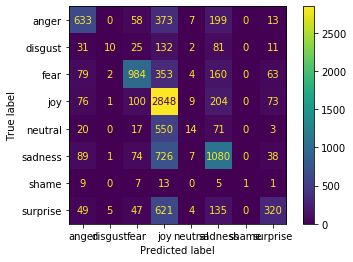

In [79]:
# plot confusion matrix
plot_confusion_matrix(nv_model, X_test,y_test)

In [137]:
### Save Model

In [88]:
import joblib

In [89]:
model_file = open("emotion_classifier_nv_model_1.sav", "wb")
joblib.dump(nv_model, model_file)
model_file.close()

In [80]:
## Model Interpration

# Eli5
# Lime
# Shap

In [81]:
# LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

C:\Users\USER\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [82]:
# Accuracy
lr_model.score(X_test, y_test)

0.622341444721211

In [83]:
# Single Predict
predict_emotion(sample_text, lr_model)

Prediction :
sadness


{'anger': 0.20826977783106854,
 'disgust': 0.04087247241432434,
 'fear': 0.05512247843223801,
 'joy': 0.12936308414744557,
 'neutral': 0.013933277490177524,
 'sadness': 0.5472963029537583,
 'shame': 0.00119250870370019,
 'surprise': 0.00395009802728754}

In [147]:
# Interpret Model
import eli5

In [148]:
# Show the Weight For Each Class/Label

In [149]:
eli5.show_weights(lr_model, top=20)

In [152]:
class_lnames = yLabels.unique().tolist()

In [154]:
feature_names = cv.get_feature_names()

In [161]:
eli5.show_weights(lr_model, feature_names=feature_names, target_names=class_lnames)

In [160]:
?eli5.show_weights

In [120]:
target_text = ["""You show an impressive grasp on this subject!"""]

In [121]:
predict_emotion(target_text, lr_model)


   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   

   34878  34879  34880  34881  34882  34883  34884  34885  34886  34887  
0      0      0      0      0      0      0      0      0      0      0  

[1 rows x 34888 columns]
Prediction :
sadness


{'anger': 0.062008168457264,
 'disgust': 0.018555238791570405,
 'fear': 0.09092595277142,
 'joy': 0.3754177820123718,
 'neutral': 0.004812789675889454,
 'sadness': 0.3974110300355229,
 'shame': 0.00114248964046384,
 'surprise': 0.04972654861549747}

In [122]:

predict_emotion(target_text, nv_model)

   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   

   34878  34879  34880  34881  34882  34883  34884  34885  34886  34887  
0      0      0      0      0      0      0      0      0      0      0  

[1 rows x 34888 columns]
Prediction :
joy


{'anger': 0.017844274858196087,
 'disgust': 0.000119083094694226,
 'fear': 0.014351604259607324,
 'joy': 0.7346191165678655,
 'neutral': 4.22640592722428e-06,
 'sadness': 0.23023804692970354,
 'shame': 5.358001475037374e-07,
 'surprise': 0.002823112083856868}

In [123]:
nv_model.score(X_test, y_test)

0.5642843456600881

In [124]:
lr_model.score(X_test, y_test)

0.622341444721211

In [153]:
sample_text = ["""He wanted to cry quietly"""]
predict_emotion(sample_text, nv_model)

   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   

   34878  34879  34880  34881  34882  34883  34884  34885  34886  34887  
0      0      0      0      0      0      0      0      0      0      0  

[1 rows x 34888 columns]
Prediction :
sadness


{'anger': 0.20885235020196,
 'disgust': 0.00020822211459702017,
 'fear': 0.004777815692627286,
 'joy': 0.3806350848616356,
 'neutral': 0.00014930544773301589,
 'sadness': 0.401407519423484,
 'shame': 3.024331353401697e-05,
 'surprise': 0.003939458944430611}

In [154]:

predict_emotion(sample_text, lr_model)

   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   

   34878  34879  34880  34881  34882  34883  34884  34885  34886  34887  
0      0      0      0      0      0      0      0      0      0      0  

[1 rows x 34888 columns]
Prediction :
sadness


{'anger': 0.12217870473614637,
 'disgust': 0.016779976840791758,
 'fear': 0.014909185893938056,
 'joy': 0.11176341338058257,
 'neutral': 0.05375232804910251,
 'sadness': 0.6544206700452251,
 'shame': 0.0035422487837119066,
 'surprise': 0.022653472270501872}

In [155]:
import joblib

# example for saving python object as pkl
joblib.dump(cv, "count-vectorizer.pkl")

['count-vectorizer.pkl']

In [156]:
model_file = open("emotion_classifier_nv_model.sav", "wb")
joblib.dump(nv_model, model_file)
model_file.close()

In [157]:
model_file = open("emotion_classifier_lr_model.sav", "wb")
joblib.dump(lr_model, model_file)
model_file.close()

In [160]:
# load the model from disk
loaded_model = joblib.load("emotion_classifier_lr_model.sav")
predict_emotion(sample_text, loaded_model)

   0      1      2      3      4      5      6      7      8      9      ...  \
0      0      0      0      0      0      0      0      0      0      0  ...   

   34878  34879  34880  34881  34882  34883  34884  34885  34886  34887  
0      0      0      0      0      0      0      0      0      0      0  

[1 rows x 34888 columns]
Prediction :
sadness


{'anger': 0.12217870473614637,
 'disgust': 0.016779976840791758,
 'fear': 0.014909185893938056,
 'joy': 0.11176341338058257,
 'neutral': 0.05375232804910251,
 'sadness': 0.6544206700452251,
 'shame': 0.0035422487837119066,
 'surprise': 0.022653472270501872}

In [ ]:
# loading pickled vectorizer
vectorizer = joblib.load("vectorizer.pkl")